In [1]:
%matplotlib inline
from fastai.basics import *

## Linear Regresion 

In [3]:
n = 100

In [4]:
x = torch.ones(n,2) #it creates a tensor with: n-rows, 2-columns filles with value-1 (PyTorch)
x[:,0].uniform_(-1.,1) #Fills the given 2-dimensional matrix with values drawn from a uniform distribution parameterized by low and high.
x[0:7] #print from 0 to 7

tensor([[-0.2427,  1.0000],
        [-0.0105,  1.0000],
        [-0.4843,  1.0000],
        [ 0.7953,  1.0000],
        [-0.4596,  1.0000],
        [ 0.7833,  1.0000],
        [-0.8607,  1.0000]])

In [5]:
a = tensor(3.,2) #3stands the slope and 2 for the intercept
a #print

tensor([3., 2.])

In [16]:
y = x@a + torch.rand(n) #matrix product between x and a + some noise (random values)
y

tensor([ 2.2486,  2.8246,  1.5368,  5.1054,  1.1535,  4.9449, -0.4954,  1.9462,
         1.8369,  4.9495,  0.2446,  1.8467,  1.7054,  1.2588,  0.6819,  1.3954,
         0.6353, -0.2058,  1.7420,  1.7389,  5.4816,  1.9510,  2.6052,  2.5770,
         4.2302,  2.0370,  1.5566,  3.4740,  4.4219,  5.3258,  1.3085,  2.1610,
         2.6802,  0.4214,  3.3327,  0.6014,  0.8817,  5.2272,  2.1091, -0.6053,
         0.4028,  0.0567,  3.1374,  2.9701,  1.2692, -0.5493,  2.4880,  4.9654,
         4.4921,  2.6703,  4.5977,  0.1174,  1.4100,  3.5398,  2.1730,  1.2959,
         0.6756,  2.3783,  0.8238,  1.8210,  0.8695,  1.8111,  4.0290,  2.2655,
         0.7313, -0.6353,  1.1920,  3.5313,  1.9317,  1.8276,  0.5271,  5.4603,
         4.5649,  1.2866,  3.8023, -0.8734,  5.0816,  0.6915, -0.1488,  0.7093,
         0.3149, -0.1493,  3.7525,  3.4887,  3.8436, -0.3855,  2.6618,  2.4566,
         5.4151,  4.7791,  3.2378,  3.5083,  1.7365,  3.0282,  2.7680,  0.1383,
         2.4383, -0.3486,  5.0118,  0.41

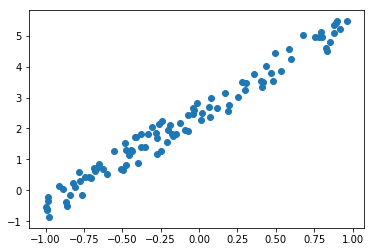

In [17]:
plt.scatter(x[:,0], y)

In [18]:
def mse(y_hat, y): return ((y_hat-y)**2).mean() #classical mse function

In [19]:
# Suppose we believe a = (-1.0,1.0) then we can compute y_hat which is our prediction and then compute our error.
a = tensor(-1.,1)
a

tensor([-1.,  1.])

In [20]:
y_hat = x@a
sgdVal = mse(y_hat, y)
sgdVal #this is what we call loss

tensor(6.2422)

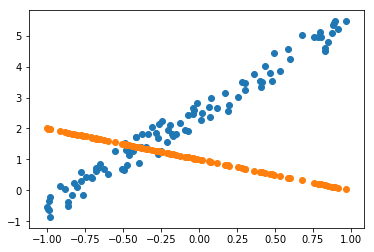

In [22]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], y_hat)


In [23]:
# So far we have specified the model (linear regression) and the evaluation criteria (or loss function). 
# Now we need to handle optimization; that is, how do we find the best values for a? 
# How do we find the best fitting linear regression.

## SGD

In [25]:
a = nn.Parameter(a) #PyTorch parameter
a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [26]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward() #calculates the derivative (the gardient). PyTorch keeps track of how it was calculated and lets us calculate the derivative
    with torch.no_grad():
        a.sub_(lr*a.grad) # the derivative gets stuck inside this attribute (.grad). _sub is substracting in place
        a.grad.zero_()

In [29]:
lr = 1e-1
for t in range(100): update()

tensor(0.0763, grad_fn=<MeanBackward1>)
tensor(0.0763, grad_fn=<MeanBackward1>)
tensor(0.0763, grad_fn=<MeanBackward1>)
tensor(0.0763, grad_fn=<MeanBackward1>)
tensor(0.0763, grad_fn=<MeanBackward1>)
tensor(0.0763, grad_fn=<MeanBackward1>)
tensor(0.0763, grad_fn=<MeanBackward1>)
tensor(0.0763, grad_fn=<MeanBackward1>)
tensor(0.0763, grad_fn=<MeanBackward1>)
tensor(0.0763, grad_fn=<MeanBackward1>)


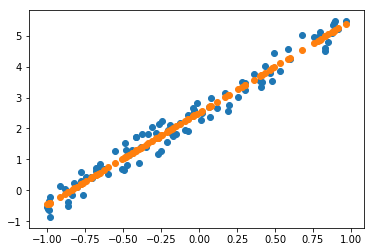

In [30]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a)